In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)


L = 1000
sigma = 0
eta = 0.09

input = np.array([[-3],[-1],[1],[3]])
output = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

data_set_t = []
data_set_x = []
for i in range(L):
    n = np.random.randint(0,4)
    data_set_t.append(output[n])
    data_set_x.append(input[n])

data_set_x_noise = data_set_x + sigma*np.random.randn(len(data_set_t),1)
data_set = np.hstack((data_set_x_noise,data_set_t))

#data_set = np.hstack((data_set_x,data_set_t))

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

# Making into tensor
train_dataset =torch.tensor(train_dataset).to(device)
test_dataset = torch.tensor(test_dataset).to(device)


In [54]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 4)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.softmax(x,dim=1)
        return x

# Define the training data
input_data = train_dataset[:,0]
input_data = torch.reshape(input_data,(amount,1))
input_data = input_data.to(torch.float32)


# Define the labels
labels = train_dataset[:,1:]
labels = torch.reshape(labels,(amount,4))
labels = labels.to(torch.float32)

# Define the model
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.09)
mse = []
# Train the model for 100 epochs
for epoch in range(1000):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = net(input_data)

    # Compute the loss
    loss = criterion(outputs, labels)
    mse.append(loss.item())

    # Backward pass and update the weights
    loss.backward()
    optimizer.step()


Testing the output on test data

In [55]:
test_input = test_dataset[:,0]
test_input = torch.reshape(test_input,(L-amount-1,1))
test_input = test_input.to(torch.float32)
output = net(test_input)
t_calc = []
for i in range(len(output)):
    result = [tensor.item() for tensor in output[i]]
    t_calc.append(result)

t = []
for i in range(len(test_dataset)):
    result = [tensor.item() for tensor in test_dataset[i,1:]]
    t.append(result)

In [56]:

classification_errors = 0
for i in range(len(output)):
    if np.argmax(t_calc[i]) == np.argmax(t[i]):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors} out of {len(t)} \nwhich is {classification_errors/len(t)*100}%')

The number of classification errors with logistic regression is: 0 out of 199 
which is 0.0%


In [57]:
found = []
for i in range(len(t_calc)):
    if np.argmax(t_calc[i]) == 0:
        found.append(3)
    elif np.argmax(t_calc[i]) == 1:
        found.append(1) 
    elif np.argmax(t_calc[i]) == 2:
        found.append(-1)
    elif np.argmax(t_calc[i]) == 3:
        found.append(-3)
found = np.array(found)

<StemContainer object of 3 artists>

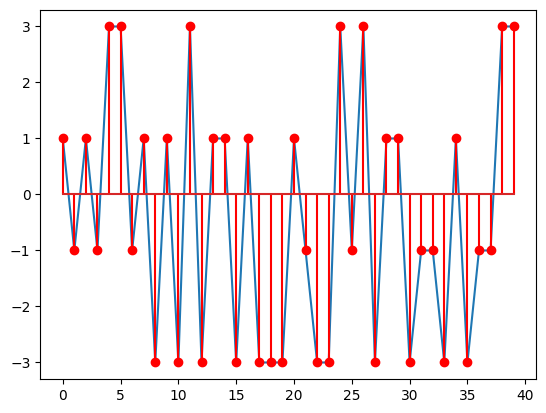

In [58]:
import matplotlib.pyplot as plt
plt.plot(test_dataset[0:40,0].to('cpu'))
plt.stem(found[0:40],'r')

In [59]:
def Neural_Network_Inator(input_size, output_size, eta=0.09, no_epochs=1000,no_hidden_nodes=50):
# Define the neural network architecture
    class Net(nn.Module):
        def __init__(self, input_size, no_hidden_nodes,output_size):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(input_size, no_hidden_nodes)
            self.fc2 = nn.Linear(no_hidden_nodes, output_size)

        def forward(self, x):
            x = self.fc1(x)
            x = torch.tanh(x)
            x = self.fc2(x)
            x = torch.softmax(x,dim=1)
            return x

    net = Net(input_size, no_hidden_nodes,output_size).to(device)

    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=eta)

    # Train the model for N epochs
    for epoch in range(no_epochs):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(input_data)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and update the weights
        loss.backward()
        optimizer.step()


In [60]:
if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu" 
device = torch.device(dev)
# Define the training data
input_data = train_dataset[:,0]
input_data = torch.reshape(input_data,(amount,1))
input_data = input_data.to(torch.float32).to(device)


# Define the labels
labels = train_dataset[:,1:]
labels = torch.reshape(labels,(amount,4))
labels = labels.to(torch.float32).to(device)

In [61]:
Neural_Network_Inator(1,4)

In [62]:
test_input = test_dataset[:,0]
test_input = torch.reshape(test_input,(L-amount-1,1))
test_input = test_input.to(torch.float32)
output = net(test_input)
t_calc = []
for i in range(len(output)):
    result = [tensor.item() for tensor in output[i]]
    t_calc.append(result)

t = []
for i in range(len(test_dataset)):
    result = [tensor.item() for tensor in test_dataset[i,1:]]
    t.append(result)

In [63]:

classification_errors = 0
for i in range(len(output)):
    if np.argmax(t_calc[i]) == np.argmax(t[i]):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors} out of {len(t)} \nwhich is {classification_errors/len(t)*100}%')

The number of classification errors with logistic regression is: 0 out of 199 
which is 0.0%


Text(0.5, 0, 'Epochs')

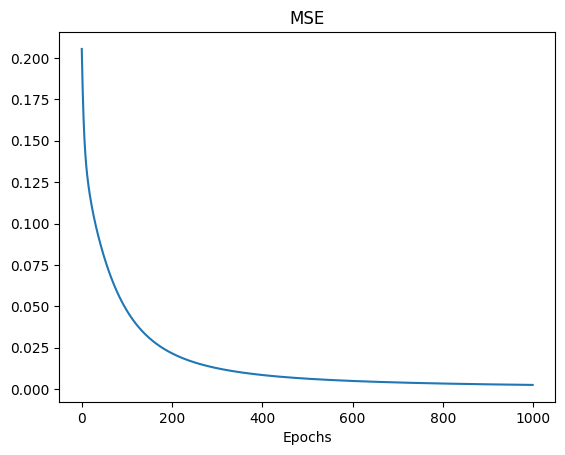

In [64]:
plt.plot(mse)
plt.title('MSE')
plt.xlabel('Epochs')